
-------------------------------------------------------------------------------
Network Intrusion Detection using Machine Learning on UNSW-NB15 Dataset
-------------------------------------------------------------------------------

Author: Damilola Yinusa
Date: 01/09/2023
Version: 1.0

Description:
This program aims to identify and classify network intrusions using various machine learning algorithms. 
The UNSW-NB15 dataset serves as the training and testing data. The program employs preprocessing techniques 
such as one-hot encoding and feature scaling before fitting the data to machine learning models. 

Key Results:
- Final model used: RandomForestClassifier
- Model accuracy: 0.8857 (88.57%)

Classification Report:
              precision    recall  f1-score   support
           0       0.75      0.97      0.84     56000
           1       0.98      0.85      0.91    119341
    accuracy                           0.89    175341
   macro avg       0.87      0.91      0.88    175341
weighted avg       0.91      0.89      0.89    175341

Training Procedure:
The model was trained using a 5-fold cross-validation scheme with RandomizedSearchCV to optimize the hyperparameters.

-------------------------------------------------------------------------------


## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



## Load the Data

In [2]:
# Load datasets #4
train_df = pd.read_csv('UNSW_NB15_training-set.csv')
test_df = pd.read_csv('UNSW_NB15_testing-set.csv')

## Preprocess the Data

In [3]:
# Combine train and test data for preprocessing #6
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Drop unnecessary columns
drop_columns = ['id', 'attack_cat']
combined_df = combined_df.drop(columns=drop_columns)

# Separate features and target labels
X = combined_df.drop('label', axis=1)
y = combined_df['label']


### Label Encoding and One-Hot Encoding

In [4]:
# Label Encoding for categorical columns #9
label_columns = ['proto', 'service', 'state']
label_encoder = LabelEncoder()
for column in label_columns:
    X[column] = label_encoder.fit_transform(X[column])
# One-hot encoding for categorical columns
X = pd.get_dummies(X, columns=label_columns)


### Standard Scaling

In [5]:
# Standard Scaling for numerical columns #469
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Apply PCA

In [6]:
# Apply PCA
pca = PCA(n_components=0.95)  # Keeping 95% of the variance
X_pca = pca.fit_transform(X_scaled)

## Split Data Back into Training and Testing Sets

In [7]:
# Split the data back into training and testing sets
train_length = len(train_df)
X_train_pca = X_pca[:train_length]
X_test_pca = X_pca[train_length:]
y_train = y[:train_length]
y_test = y[train_length:]


using `X_train_pca` and `X_test_pca` for further modeling.

# Model Training Using Random Search for Hyperparameter Tuning

In [8]:
# Define the model
rf = RandomForestClassifier()

# Create the hyperparameter grid
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('model', RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1))])

# Preprocessing of training data, fit model 
pipeline.fit(X_train_pca, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Pipeline(steps=[('model',
                 RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                                    n_iter=100, n_jobs=-1,
                                    param_distributions={'max_depth': [None, 10,
                                                                       20, 30],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10],
                                                         'n_estimators': [10,
                                                                          50,
                                                                          100,
                                                                          200]},
                                    random_state=42, verbose=2))])

# Model Evaluation

In [9]:
# Preprocessing of validation data, get predictions
preds = pipeline.predict(X_test_pca)

# Evaluate the model
score = accuracy_score(y_test, preds)
print('Accuracy:', score)


Accuracy: 0.8855886529676459


##### Feature Importances

<Figure size 2000x1000 with 0 Axes>

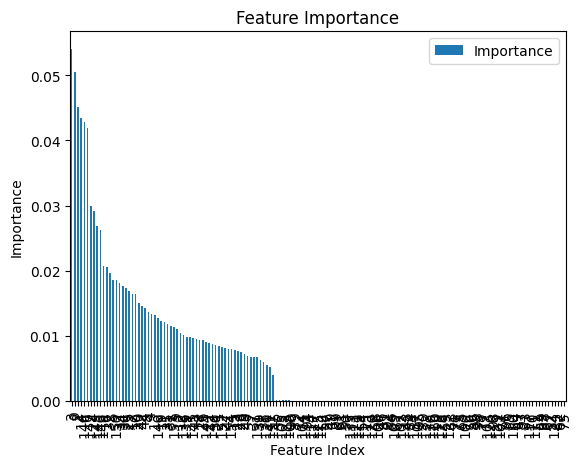

In [10]:
#469 # Assuming my trained Random Forest model is stored in a variable named 'rf_random'
feature_importances = pipeline.named_steps['model'].best_estimator_.feature_importances_

# Creating a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Importance': feature_importances})

# Plotting
plt.figure(figsize=(20, 10))
feature_importance_df.sort_values('Importance', ascending=False).plot(kind='bar')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


##### Confusion Matrix

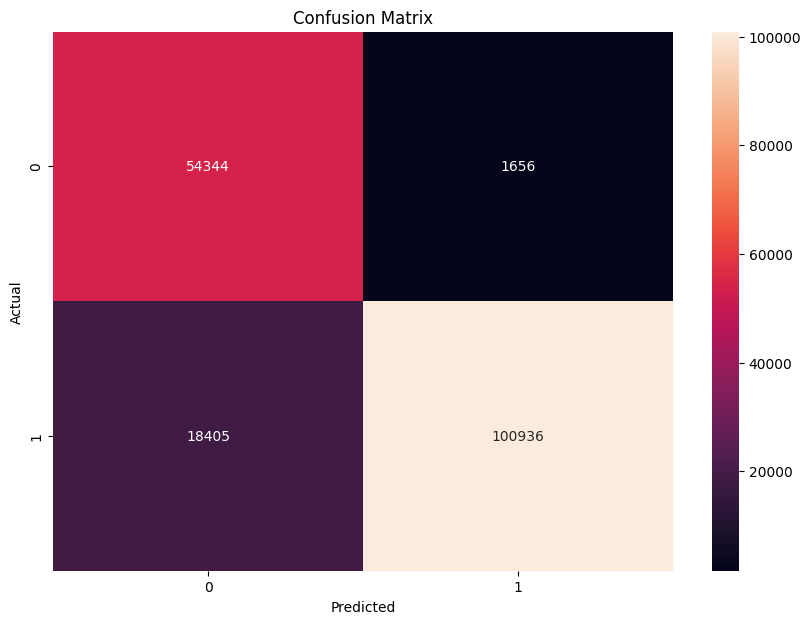

In [11]:
# Assuming my test set labels are stored in a variable named 'y_test'
y_pred = pipeline.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##### Classification Report

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.84     56000
           1       0.98      0.85      0.91    119341

    accuracy                           0.89    175341
   macro avg       0.87      0.91      0.88    175341
weighted avg       0.91      0.89      0.89    175341



# Section: Optimized Model
This section contains the optimized model using XGBoost.

## Anomaly Detection in Network Security with Optimizations

In [13]:
!pip install xgboost

In [14]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier


In [15]:

# Load the data
train_df = pd.read_csv('UNSW_NB15_training-set.csv')
test_df = pd.read_csv('UNSW_NB15_testing-set.csv')


In [16]:

# Combine train and test data for preprocessing
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Drop unnecessary columns
drop_columns = ['id', 'attack_cat']
combined_df = combined_df.drop(columns=drop_columns)

# Separate features and target labels
X = combined_df.drop('label', axis=1)
y = combined_df['label']

# Label Encoding for categorical columns
label_columns = ['proto', 'service', 'state']
label_encoder = LabelEncoder()
for column in label_columns:
    X[column] = label_encoder.fit_transform(X[column])

# One-hot encoding for categorical columns
X = pd.get_dummies(X, columns=label_columns)

# Standard Scaling for numerical columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Split the data back into training and testing sets
train_length = len(train_df)
X_train_pca = X_pca[:train_length]
X_test_pca = X_pca[train_length:]
y_train = y[:train_length]
y_test = y[train_length:]


In [18]:

# Initialize XGBoost Classifier
xgb_model = XGBClassifier()

# Create the hyperparameter grid
xgb_param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'gamma': [0, 0.1, 0.2]
}

# Create and evaluate the pipeline with XGBoost
xgb_pipeline = Pipeline(steps=[('model', RandomizedSearchCV(xgb_model, param_distributions=xgb_param_dist, 
                                                            n_iter=100, cv=5, verbose=2, 
                                                            random_state=42, n_jobs=-1))])

# Fit the model
xgb_pipeline.fit(X_train_pca, y_train)

# Make predictions and evaluate
y_pred_xgb = xgb_pipeline.predict(X_test_pca)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
XGBoost Accuracy: 0.8890048533999464


In [19]:

import joblib

# Save the model to disk
joblib.dump(xgb_pipeline, 'optimized_xgboost_model.pkl')


['optimized_xgboost_model.pkl']

In [20]:

# Load the model from disk for inference
loaded_xgb_pipeline = joblib.load('optimized_xgboost_model.pkl')

# Example of making predictions
# new_predictions = loaded_xgb_pipeline.predict(new_data_pca)
